In [1]:
import configparser
import boto3
import pandas as pd

# Load AWS credentials from the configuration file
config = configparser.ConfigParser()
config.read('aws.cfg')

aws_access_key = config.get('AWS','aws_access_key_id')
aws_secret_key = config.get('AWS','aws_secret_access_key')
region_name = config.get('AWS', 'region_name')


In [2]:
s3 = boto3.client(
    's3',
    aws_access_key_id=aws_access_key,
    aws_secret_access_key=aws_secret_key,
    region_name = region_name

)

In [3]:
df_review = pd.read_csv('s3://techcatalyst-public/resources/sentiment/review.csv') # YOUR CODE 

In [4]:
df_product = pd.read_csv('s3://techcatalyst-public/resources/sentiment/product.csv')

In [5]:
df_review.head(5)

,REVIEW ID,REVIEW TEXT
0,R1,"Great camera quality, but battery life could b..."
1,R2,Very satisfied with this smartphone. Worth eve...
2,R3,Excellent performance and battery life. Highly...
3,R4,Disappointed with the build quality. Feels cheap.
4,R5,Fantastic noise cancellation and sound quality.


In [6]:
df_product.head(5)

,PRODUCT ID,PRODUCT DESCRIPTION,REVIEW ID
0,1,High-quality smartphone with excellent camera.,R1
1,1,High-quality smartphone with excellent camera.,R2
2,2,Durable laptop with long battery life.,R3
3,2,Durable laptop with long battery life.,R4
4,3,Wireless noise-canceling headphones.,R5


In [7]:
combined_df = pd.merge(df_product, df_review, how='left', left_on='REVIEW ID', right_on='REVIEW ID')

In [8]:
combined_df

,PRODUCT ID,PRODUCT DESCRIPTION,REVIEW ID,REVIEW TEXT
0,1,High-quality smartphone with excellent camera.,R1,"Great camera quality, but battery life could b..."
1,1,High-quality smartphone with excellent camera.,R2,Very satisfied with this smartphone. Worth eve...
2,2,Durable laptop with long battery life.,R3,Excellent performance and battery life. Highly...
3,2,Durable laptop with long battery life.,R4,Disappointed with the build quality. Feels cheap.
4,3,Wireless noise-canceling headphones.,R5,Fantastic noise cancellation and sound quality.
5,3,Wireless noise-canceling headphones.,R6,Not comfortable to wear for long periods.
6,4,Smartwatch with various health tracking features.,R7,Great health tracking features but too expensive.
7,4,Smartwatch with various health tracking features.,R8,Love the design and functionality. Would buy a...
8,5,Portable Bluetooth speaker with rich sound.,R9,Sound quality is amazing for its size.
9,5,Portable Bluetooth speaker with rich sound.,R10,Battery life is too short for outdoor use.


In [9]:
import boto3

comprehend = boto3.client('comprehend',
    aws_access_key_id=aws_access_key,
    aws_secret_access_key=aws_secret_key,
    region_name = region_name)


In [11]:
response_2 = []
for row in combined_df['REVIEW TEXT']:
    response = comprehend.detect_sentiment(Text= row, LanguageCode="en")
    response_1 = response['Sentiment']
    response_2.append(response_1)

In [12]:
combined_df['Sentiment']= response_2

product_sentiment = combined_df

product_sentiment.to_csv('product_sentiment.csv', encoding='utf-8')

In [13]:
# Initialize the S3 client

# Define the file to upload and the target bucket and key
filename = '/workspaces/techcatalyst-DE-andy/activities/ai_api/product_sentiment.csv'  # Replace with your file path
bucket_name = 'techcatalyst-public/andy'  # Replace with your bucket name
key = 'product_sentiment.csv'  # Replace with your file key in S3

# # Upload the file to S3 using put_object
# s3.upload_file(filename,bucket_name,key)


In [14]:
product_sentiment.to_csv('s3://techcatalyst-public/andy/product_sentiment.csv', encoding= 'utf-8', index=False, header= True)

In [15]:
product_sentiment.groupby(['Sentiment']).size()

Sentiment
MIXED        2
NEGATIVE     8
POSITIVE    10
dtype: int64

In [16]:
count = product_sentiment.groupby(['Sentiment']).size().reset_index(name= 'count').sort_values('Sentiment',ascending=False)
count_act= count['count']
count_sen = count['Sentiment']


/tmp/ipykernel_52016/403095017.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Fruit color')


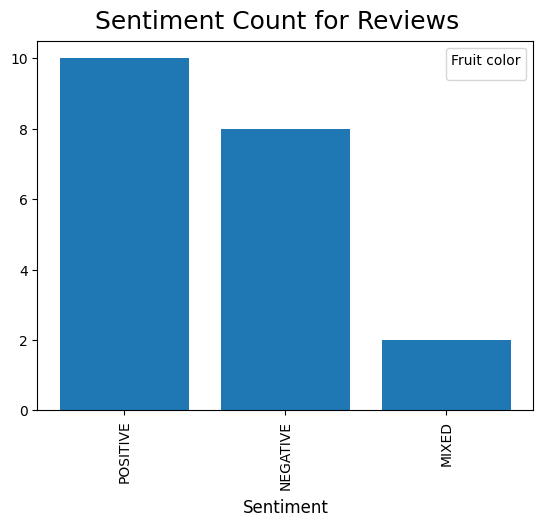

In [17]:
# Import Matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fruits = count_sen
counts = count_act

ax.bar(fruits, counts)

# ax.set_title('Sentiment Count for Reviews')
fig.text(s='Sentiment Count for Reviews', x=0.5, y=.92, fontsize=18, ha='center', va='center')
ax.set_title('Sentiment', y=-0.3)
ax.legend(title='Fruit color')


ax.tick_params(axis='x', rotation=90)
plt.savefig('sentiment analysis.jpg', format='jpg') # order matters
plt.show()



In [ ]:
# # Initialize the S3 client

# # Define the file to upload and the target bucket and key
# filename = '/workspaces/techcatalyst-DE-andy/activities/ai_api/sentiment analysis.jpg'  # Replace with your file path
# bucket_name = 'techcatalyst-public'  # Replace with your bucket name
# key = 'andy/sentiment analysis.jpg'  # Replace with your file key in S3

# # Upload the file to S3 using put_object
# s3.upload_file(filename,bucket_name,key)

In [10]:
df_license = pd.read_csv('s3://techcatalyst-public/resources/license-plates/states.csv')

In [11]:
df_license.head(5)

,0
0,Alabama
1,Alaska
2,Arizona
3,Arkansas
4,California


In [12]:
df_license = df_license.rename(columns={'0':'State'})

In [13]:
df_license.head(5)

,State
0,Alabama
1,Alaska
2,Arizona
3,Arkansas
4,California


In [14]:
rek = boto3.client(
    'rekognition',
    aws_access_key_id=aws_access_key,
    aws_secret_access_key=aws_secret_key,
    region_name = region_name

)

In [15]:
bucket = 'techcatalyst-public'  
Image = 'resources/license-plates/'

In [16]:
response = s3.list_objects_v2(
    Bucket=bucket,
    Prefix=Image)

pics = [] 
for content in response.get('Contents', []):
    pics.append(content['Key'])
    print(content['Key'])

resources/license-plates/
resources/license-plates/license_plate10.jpeg
resources/license-plates/license_plate11.png
resources/license-plates/license_plate12.jpeg
resources/license-plates/license_plate13.jpeg
resources/license-plates/license_plate3.png
resources/license-plates/license_plate4.jpeg
resources/license-plates/license_plate6.jpeg
resources/license-plates/license_plate7.jpg
resources/license-plates/license_plate8.png
resources/license-plates/license_plate9.jpeg
resources/license-plates/states.csv


In [17]:
pics

['resources/license-plates/',
 'resources/license-plates/license_plate10.jpeg',
 'resources/license-plates/license_plate11.png',
 'resources/license-plates/license_plate12.jpeg',
 'resources/license-plates/license_plate13.jpeg',
 'resources/license-plates/license_plate3.png',
 'resources/license-plates/license_plate4.jpeg',
 'resources/license-plates/license_plate6.jpeg',
 'resources/license-plates/license_plate7.jpg',
 'resources/license-plates/license_plate8.png',
 'resources/license-plates/license_plate9.jpeg',
 'resources/license-plates/states.csv']

In [18]:
pic_names = pd.DataFrame({'images':pics})

In [19]:
pic_names

,images
0,resources/license-plates/
1,resources/license-plates/license_plate10.jpeg
2,resources/license-plates/license_plate11.png
3,resources/license-plates/license_plate12.jpeg
4,resources/license-plates/license_plate13.jpeg
5,resources/license-plates/license_plate3.png
6,resources/license-plates/license_plate4.jpeg
7,resources/license-plates/license_plate6.jpeg
8,resources/license-plates/license_plate7.jpg
9,resources/license-plates/license_plate8.png


In [20]:
drop_state = pic_names[pic_names.images == 'resources/license-plates/states.csv'].index
drop_resource = pic_names[pic_names.images == 'resources/license-plates/'].index

In [21]:
df_pic_1 = pic_names.drop(drop_state)
only_pics = df_pic_1.drop(drop_resource)

In [22]:
only_pics

,images
1,resources/license-plates/license_plate10.jpeg
2,resources/license-plates/license_plate11.png
3,resources/license-plates/license_plate12.jpeg
4,resources/license-plates/license_plate13.jpeg
5,resources/license-plates/license_plate3.png
6,resources/license-plates/license_plate4.jpeg
7,resources/license-plates/license_plate6.jpeg
8,resources/license-plates/license_plate7.jpg
9,resources/license-plates/license_plate8.png
10,resources/license-plates/license_plate9.jpeg


In [23]:
df_states = df_license['State'].to_list()


In [47]:
# response_2 = []
# for row in combined_df['REVIEW TEXT']:
#     response = comprehend.detect_sentiment(Text= row, LanguageCode="en")
#     response_1 = response['Sentiment']
#     response_2.append(response_1)

# zero= response['TextDetections'][0]
# zero['DetectedText']


# response_3 = []
# for row in only_pics['images']:
#     response = rek.detect_text(Image={'S3Object': {'Bucket': bucket, 'Name': row}})
#     response_4 = response['TextDetections'][0]
#     response_5 = response_4['DetectedText']
#     print(response_3.append(response_5))


upper_list = [item.upper() for item in df_states]
num_rows = min(len(only_pics['images']), 10)

response_3 = []
for row in only_pics['images']:
    response_r = rek.detect_text(Image={'S3Object': {'Bucket': bucket, 'Name': row}})
    response_T = response_r['TextDetections'][0]
    response_w = response_r['TextDetections'][1]
    # for b in response_r['TextDetections']:
    if (response_T['DetectedText']) in upper_list or (response_T['DetectedText']) in df_states:
        response_3.append(response_T['DetectedText'])
    if (response_w['DetectedText']) in upper_list or (response_w['DetectedText']) in df_states:
        response_3.append(response_w['DetectedText'])


print(response_3)

['ARIZONA', 'TEXAS', 'TEXAS', 'ALABAMA', 'Massachusetts', 'California', 'NEVADA', 'OHIO', 'ALABAMA']


In [34]:
response_6 = []
response_7= []
for row in only_pics['images']:
    response_r = rek.detect_text(Image={'S3Object': {'Bucket': bucket, 'Name': row}})
    for b in response_r['TextDetections'][:10]:
        if (b['DetectedText']) in upper_list or (b['DetectedText']) in df_states:
            #response_6.append(f"[{row}], {[b['DetectedText']]}")
            response_6.append(b['DetectedText'])
            response_7.append(row)

    


print(response_6)
print(response_7)


['ARIZONA', 'ARIZONA', 'TEXAS', 'TEXAS', 'TEXAS', 'TEXAS', 'ALABAMA', 'ALABAMA', 'Massachusetts', 'Massachusetts', 'Massachusetts', 'PENNSYLVANIA', 'California', 'California', 'NEVADA', 'NEVADA', 'OHIO', 'OHIO', 'ALABAMA', 'ALABAMA']
['resources/license-plates/license_plate10.jpeg', 'resources/license-plates/license_plate10.jpeg', 'resources/license-plates/license_plate11.png', 'resources/license-plates/license_plate11.png', 'resources/license-plates/license_plate12.jpeg', 'resources/license-plates/license_plate12.jpeg', 'resources/license-plates/license_plate13.jpeg', 'resources/license-plates/license_plate13.jpeg', 'resources/license-plates/license_plate3.png', 'resources/license-plates/license_plate3.png', 'resources/license-plates/license_plate3.png', 'resources/license-plates/license_plate4.jpeg', 'resources/license-plates/license_plate6.jpeg', 'resources/license-plates/license_plate6.jpeg', 'resources/license-plates/license_plate7.jpg', 'resources/license-plates/license_plate7.jp

In [35]:
state_names = pd.DataFrame({'co1':response_6})

In [36]:
image_names=pd.DataFrame({'images':response_7})

In [37]:
image_names['States'] = response_6

In [38]:
image_names

,images,States
0,resources/license-plates/license_plate10.jpeg,ARIZONA
1,resources/license-plates/license_plate10.jpeg,ARIZONA
2,resources/license-plates/license_plate11.png,TEXAS
3,resources/license-plates/license_plate11.png,TEXAS
4,resources/license-plates/license_plate12.jpeg,TEXAS
5,resources/license-plates/license_plate12.jpeg,TEXAS
6,resources/license-plates/license_plate13.jpeg,ALABAMA
7,resources/license-plates/license_plate13.jpeg,ALABAMA
8,resources/license-plates/license_plate3.png,Massachusetts
9,resources/license-plates/license_plate3.png,Massachusetts


In [39]:
df_l = image_names.drop_duplicates()
#df['column_name'].str.lower()
df_l['States']=df_l['States'].str.lower()
df_l

/tmp/ipykernel_52016/1204763307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l['States']=df_l['States'].str.lower()


,images,States
0,resources/license-plates/license_plate10.jpeg,arizona
2,resources/license-plates/license_plate11.png,texas
4,resources/license-plates/license_plate12.jpeg,texas
6,resources/license-plates/license_plate13.jpeg,alabama
8,resources/license-plates/license_plate3.png,massachusetts
11,resources/license-plates/license_plate4.jpeg,pennsylvania
12,resources/license-plates/license_plate6.jpeg,california
14,resources/license-plates/license_plate7.jpg,nevada
16,resources/license-plates/license_plate8.png,ohio
18,resources/license-plates/license_plate9.jpeg,alabama


In [40]:
df2 = df_l.reset_index(drop=True)

In [41]:


image_state = df2

image_state.to_csv('image_state.csv', encoding='utf-8',header = True)

image_state

,images,States
0,resources/license-plates/license_plate10.jpeg,arizona
1,resources/license-plates/license_plate11.png,texas
2,resources/license-plates/license_plate12.jpeg,texas
3,resources/license-plates/license_plate13.jpeg,alabama
4,resources/license-plates/license_plate3.png,massachusetts
5,resources/license-plates/license_plate4.jpeg,pennsylvania
6,resources/license-plates/license_plate6.jpeg,california
7,resources/license-plates/license_plate7.jpg,nevada
8,resources/license-plates/license_plate8.png,ohio
9,resources/license-plates/license_plate9.jpeg,alabama


In [42]:
# Initialize the S3 client

# Define the file to upload and the target bucket and key
filename = '/workspaces/techcatalyst-DE-andy/activities/ai_api/image_state.csv'  # Replace with your file path
bucket_name = 'techcatalyst-public'  # Replace with your bucket name
key = 'andy/image_state.csv'  # Replace with your file key in S3

# # Upload the file to S3 using put_object
s3.upload_file(filename,bucket_name,key)

In [43]:
count = image_state.groupby(['States']).size().reset_index(name= 'count').sort_values('count',ascending=False)
count_act= count['count']
count_sen = count['States']


/tmp/ipykernel_52016/1495926391.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Fruit color')


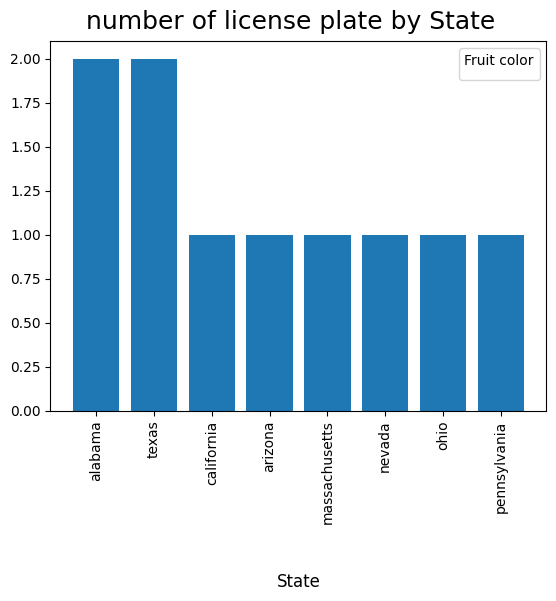

In [44]:
# Import Matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fruits = count_sen
counts = count_act

ax.bar(fruits, counts)

# ax.set_title('Sentiment Count for Reviews')
fig.text(s='number of license plate by State', x=0.5, y=.92, fontsize=18, ha='center', va='center')
ax.set_title('State', y=-0.5)
ax.legend(title='Fruit color')


ax.tick_params(axis='x', rotation=90)
plt.savefig('license plate state summary.jpg', format='jpg') # order matters
plt.show()


In [45]:
# Initialize the S3 client

# Define the file to upload and the target bucket and key
filename = '/workspaces/techcatalyst-DE-andy/activities/ai_api/license plate state summary.jpg'  # Replace with your file path
bucket_name = 'techcatalyst-public'  # Replace with your bucket name
key = 'andy/license plate state summary.jpg'  # Replace with your file key in S3

# # Upload the file to S3 using put_object
s3.upload_file(filename,bucket_name,key)